In [96]:
import numpy as np
from statistics import mode
from pprint import pprint
from tqdm import tqdm_notebook
import math
from matplotlib import pyplot

In [48]:
def euclidian_distance(vector1, vector2):
    temp = sum([(i-j)**2 for i,j in zip(vector1,vector2)])
    return math.sqrt(temp)

In [248]:
class KNN:
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    def fit(self,X, y):
        self.X = X
        self.y = y
    
    def predict(self,vector, k):
        distances = []
        for i in tqdm_notebook(self.X):
            distances.append(euclidian_distance(vector,i))
        closest_items=None
        flag = True
        
        argsorted_distances = np.argsort(distances).tolist()

        while True:
            closest_items = argsorted_distances[:k]

            classes = [self.y[i] for i in closest_items]
            try:
                return mode(classes)
            except:
                k= k+1
                print('Multiple classes were equally likely, increase count of k to ',k)
            if k<len(closest_items):
                flag = False
    
    def visualise(self):
        pyplot.clf()
        if len(self.X[0])!=2:
            raise Exception('Data is of not 2d so cannot visualise')
        
        markers = ['P','v','*','s','X']

        for i in range(len(self.X)):            
            x_1, y_1 = self.X[i]
            color_select = self.y[i]
            pyplot.scatter(x_1, y_1, c=self.colors[color_select])
        pyplot.legend()
        
    def predict_visualise(self, vector, k):
        pyplot.clf()
        if len(self.X[0])!=2:
            raise Exception('Data is of not 2d so cannot visualise')
        
        markers = ['P','v','*','s','X']

        for i in range(len(self.X)):            
            x_1, y_1 = self.X[i]
            color_select = self.y[i]
            pyplot.scatter(x_1, y_1, c=self.colors[color_select])
        
        pyplot.scatter(vector[0],vector[1],marker = '*',c='k')
        
        distances = []
        for i in tqdm_notebook(self.X):
            distances.append(euclidian_distance(vector,i))
        closest_items=None
        flag = True
        argsorted_distances = np.argsort(distances).tolist()
        while True:
            closest_items = argsorted_distances[:k]
                
            classes = [self.y[i] for i in closest_items]
            
            for i in closest_items:
                pyplot.plot([vector[0],self.X[i][0]], [vector[1],self.X[i][1]], 'k-', lw=2, c=self.colors[self.y[i]])
            
            try:
                return mode(classes)
            except:
                k= k+1
                print('Multiple classes were equally likely, increase count of k to ',k)
            if k<len(closest_items):
                flag = False

In [190]:
import random
def generate_data(data_points=10, features=2, feature_range=(0,100),classes=3):
    
    X = []
    for i in range(data_points):
        temp = random.sample(range(feature_range[0],feature_range[1]), features)
        X.append(temp)
    
    y = [random.randrange(classes) for i in range(data_points)]
    return X, y

In [213]:
pprint(X)

[[11, 44],
 [99, 97],
 [89, 86],
 [38, 93],
 [48, 99],
 [85, 2],
 [50, 82],
 [68, 7],
 [73, 12],
 [28, 34]]


In [193]:
y

[2, 0, 2, 1, 1, 1, 1, 1, 1, 1]

In [249]:
X, y = generate_data(data_points=50, classes=4)

No handles with labels found to put in legend.


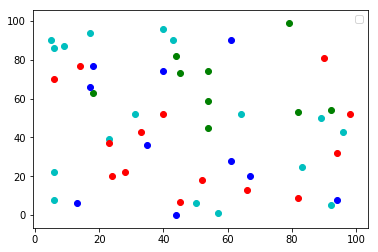

In [250]:
model = KNN()
model.fit(X,y)
model.visualise()

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

3

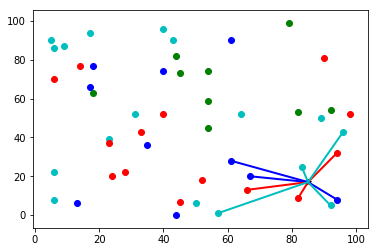

In [254]:
#model.predict([9,50],3)
test = random.sample(range(100),2)
model.predict_visualise(test,10)

In [252]:
model.colors

['b', 'g', 'r', 'c', 'm', 'y']

In [210]:
# model.colors